In [ ]:
# imports
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sklearn
from sklearn.datasets import load_iris

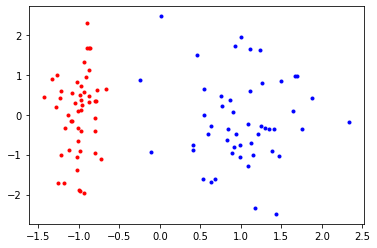

In [ ]:
# generate a separable dataset
separable = False
while not separable:
    sep_samples = sklearn.datasets.make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
    red = sep_samples[0][sep_samples[1] == 0]
    blue = sep_samples[0][sep_samples[1] == 1]
    separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.show()

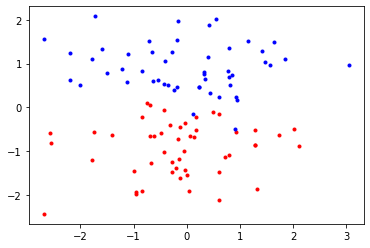

In [ ]:
# generate a non-spearable dataset
separable = True
while separable:
    nsep_samples = sklearn.datasets.make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
    red = nsep_samples[0][nsep_samples[1] == 0]
    blue = nsep_samples[0][nsep_samples[1] == 1]
    separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.show()

In [ ]:
def ptrCE_gen(X, t, W, N, alpha):
  X = np.concatenate((np.ones((t.size, 1)), X), 1)
  for n in range(0, N, 1):
    for i in range(0, t.size, 1):
      z = sum(W*X[i, :])
      y = 1./(1+np.exp(-z))
      W = W - alpha*((-t[i]/y+((1-t[i])/(1-y)))*(y*(1-y)))*X[i, :]
  cnt =0
  for i in range(0, t.size, 1):
    z = sum(W*X[i, :])
    y = 1./(1+np.exp(-z))
    if y<0.5:
      c=0
    else:
      c=1

    if(c!=t[i]):
      print("mismatched[", i, "]", c, t[i])
      cnt+=1
  print(cnt, "mismatched")
  return W


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


mismatched[ 3 ] 1 0
mismatched[ 6 ] 1 0
mismatched[ 8 ] 1 0
mismatched[ 9 ] 1 0
mismatched[ 13 ] 1 0
mismatched[ 14 ] 1 0
mismatched[ 16 ] 1 0
mismatched[ 17 ] 1 0
mismatched[ 18 ] 1 0
mismatched[ 19 ] 1 0
mismatched[ 21 ] 1 0
mismatched[ 23 ] 1 0
mismatched[ 24 ] 1 0
mismatched[ 26 ] 1 0
mismatched[ 27 ] 1 0
mismatched[ 28 ] 1 0
mismatched[ 29 ] 1 0
mismatched[ 32 ] 1 0
mismatched[ 37 ] 1 0
mismatched[ 38 ] 1 0
mismatched[ 39 ] 1 0
mismatched[ 40 ] 1 0
mismatched[ 41 ] 1 0
mismatched[ 42 ] 1 0
mismatched[ 45 ] 1 0
mismatched[ 47 ] 1 0
mismatched[ 49 ] 1 0
mismatched[ 51 ] 1 0
mismatched[ 54 ] 1 0
mismatched[ 55 ] 1 0
mismatched[ 56 ] 1 0
mismatched[ 57 ] 1 0
mismatched[ 59 ] 1 0
mismatched[ 61 ] 1 0
mismatched[ 62 ] 1 0
mismatched[ 63 ] 1 0
mismatched[ 66 ] 1 0
mismatched[ 67 ] 1 0
mismatched[ 73 ] 1 0
mismatched[ 74 ] 1 0
mismatched[ 76 ] 1 0
mismatched[ 81 ] 1 0
mismatched[ 83 ] 1 0
mismatched[ 85 ] 1 0
mismatched[ 88 ] 1 0
mismatched[ 90 ] 1 0
mismatched[ 91 ] 1 0
mismatched[ 92 ] 

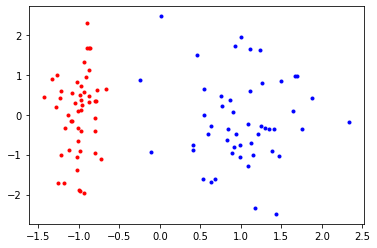

In [ ]:
# performing logistic regression classification for separable dataset
W = [0, 0, 0]
W = ptrCE_gen(sep_samples[0], sep_samples[1] , W, 1000, 0.5)
print(W)

red = sep_samples[0][sep_samples[1] == 0]
blue = sep_samples[0][sep_samples[1] == 1]
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
x_values = [np.min(sep_data[:, 0]), np.max(sep_data[:, 0])]
y_values = np.dot((-1/W[2]), (np.dot(W[1], x_values)+W[0]))
plt.plot(x_values, y_values, label='Decision Boundary')
plt.show()

mismatched[ 36 ] 1 0
mismatched[ 58 ] 0 1
mismatched[ 76 ] 0 1
mismatched[ 84 ] 1 0
4 mismatched
[0.00107691 0.02177758 0.40244656]


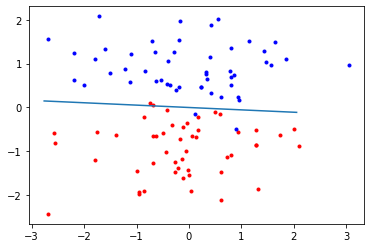

In [ ]:
# performing logistic regression classification for separable dataset
W = [0, 0, 0]
W = ptrCE_gen(nsep_samples[0], nsep_samples[1] , W, 100, 0.0001)
print(W)

red = nsep_samples[0][nsep_samples[1] == 0]
blue = nsep_samples[0][nsep_samples[1] == 1]
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
x_values = [np.min(nsep_data[:, 0]), np.max(nsep_data[:, 0])]
y_values = np.dot((-1/W[2]), (np.dot(W[1], x_values)+W[0]))
plt.plot(x_values, y_values, label='Decision Boundary')
plt.show()

In [ ]:
# with logistic cross entropy
def ptrLCE_gen(X, t, W, N, alpha):
  X = np.concatenate((np.ones((t.size, 1)), X), 1)
  for n in range(0, N, 1):
    for i in range(0, t.size, 1):
      z = sum(W*X[i, :])
      y = 1./(1+np.exp(-z))
      W = W - alpha*(y-t[i])*X[i, :]
  cnt =0
  for i in range(0, t.size, 1):
    z = sum(W*X[i, :])
    y = 1./(1+np.exp(-z))
    if y<0.5:
      c=0
    else:
      c=1

    if(c!=t[i]):
      print("mismatched[", i, "]", c, t[i])
      cnt+=1
  print(cnt, "mismatched")
  return W


0 mismatched
[2.77443304 8.55038293 0.25199606]


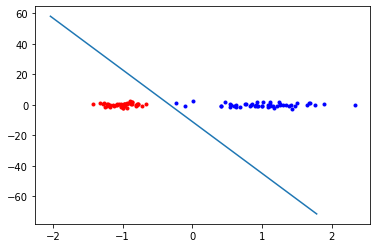

In [ ]:
# performing LCE classification for separable dataset
W = [0, 0, 0]
W = ptrLCE_gen(sep_samples[0], sep_samples[1] , W, 1000, 0.01)
print(W)

red = sep_samples[0][sep_samples[1] == 0]
blue = sep_samples[0][sep_samples[1] == 1]
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
x_values = [np.min(sep_data[:, 0]), np.max(sep_data[:, 0])]
y_values = np.dot((-1/W[2]), (np.dot(W[1], x_values)+W[0]))
plt.plot(x_values, y_values, label='Decision Boundary')
plt.show()

mismatched[ 36 ] 1 0
mismatched[ 58 ] 0 1
mismatched[ 76 ] 0 1
mismatched[ 84 ] 1 0
4 mismatched
[0.00107691 0.02177758 0.40244656]


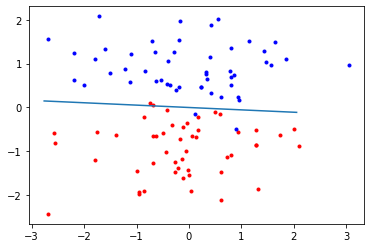

In [ ]:
# performing LCE classification for separable dataset
W = [0, 0, 0]
W = ptrLCE_gen(nsep_samples[0], nsep_samples[1] , W, 100, 0.0001)
print(W)

red = nsep_samples[0][nsep_samples[1] == 0]
blue = nsep_samples[0][nsep_samples[1] == 1]
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
x_values = [np.min(nsep_data[:, 0]), np.max(nsep_data[:, 0])]
y_values = np.dot((-1/W[2]), (np.dot(W[1], x_values)+W[0]))
plt.plot(x_values, y_values, label='Decision Boundary')
plt.show()